<a href="https://colab.research.google.com/github/sonaopt1991/sonap/blob/main/Exit_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMport essential libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the given data**

In [71]:
data=pd.read_csv('/content/customer_churn.csv')

In [72]:
df=data.copy()

**Display the dataset**

In [73]:
pd.set_option('display.max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**checking shape,columns,missingvalues **

total charge is here object type convert to numerical

In [76]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [77]:
df['TotalCharges'].dtypes

dtype('float64')

SHAPE OF THE DATA

In [78]:
df.shape

(7043, 21)

Dataset consist of 7043 observations and 21 columns

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


Display column names

In [80]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Finding missing values

In [81]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


Out of 21 columns except 5 columns all columns have null values

PErcentage of null value

In [82]:
#Checking the percentage of null values in each feature
#Step 1 - Creating a list of features with null values
features_with_na = [features for features in df.columns if df[features].isnull().sum()>0]

#Step2 -Print the feature name and percentage of missing values

for feature in features_with_na:
    print(feature,(df[feature].isnull().mean()), ' % missing values')

SeniorCitizen 0.0009938946471674003  % missing values
tenure 0.0018458043447394576  % missing values
PhoneService 0.0018458043447394576  % missing values
MultipleLines 0.0018458043447394576  % missing values
InternetService 0.005253443135027687  % missing values
OnlineSecurity 0.0021297742439301435  % missing values
OnlineBackup 0.0021297742439301435  % missing values
DeviceProtection 0.0021297742439301435  % missing values
TechSupport 0.0021297742439301435  % missing values
StreamingTV 0.003123668891097544  % missing values
StreamingMovies 0.0019877892943348007  % missing values
Contract 0.0035496237398835724  % missing values
PaperlessBilling 0.0019877892943348007  % missing values
PaymentMethod 0.0001419849495953429  % missing values
MonthlyCharges 0.0022717591935254864  % missing values
TotalCharges 0.002555729092716172  % missing values


negligible no of null values are present

In [83]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,float64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


3 numerical columns and all other columns are categorical

Displaying categorical features

In [84]:
# Creating a list of categorical features
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print("The length of categorical variables: ", len(cat_features))

#display the numerical variables
df[cat_features].columns

The length of categorical variables:  17


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

Displaying Numerical features

In [87]:
#creating a list of numerical features
numerical_features= df.select_dtypes(include='number').columns.tolist()
print("The length of numerical variables: ", len(numerical_features))
#display the numerical variables
df[numerical_features].columns

The length of numerical variables:  4


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Statistics of the dataset

In [88]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7036.000000,7030.000000,7027.000000,7025.000000
mean,0.162024,32.367568,64.757855,2283.229502
std,0.368499,24.560644,30.091845,2266.667296
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.300000
50%,0.000000,29.000000,70.350000,1397.300000
75%,0.000000,55.000000,89.850000,3795.450000
max,1.000000,72.000000,118.750000,8684.800000


Checking for outliers

In [89]:
df[numerical_features].dtypes

,0
SeniorCitizen,float64
tenure,float64
MonthlyCharges,float64
TotalCharges,float64


UNIVARIATE AND BIVARIATE ANALYSIS

<Axes: >

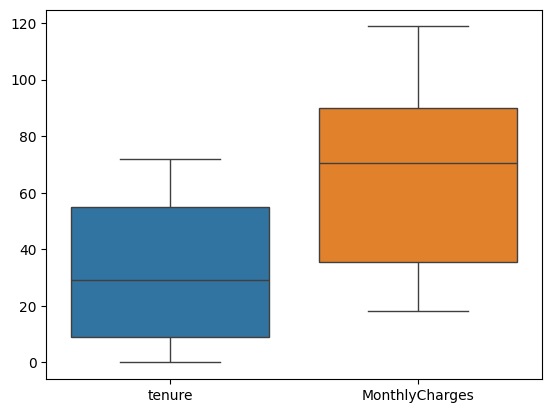

In [91]:
sns.boxplot(df[['tenure','MonthlyCharges']])

<Axes: ylabel='TotalCharges'>

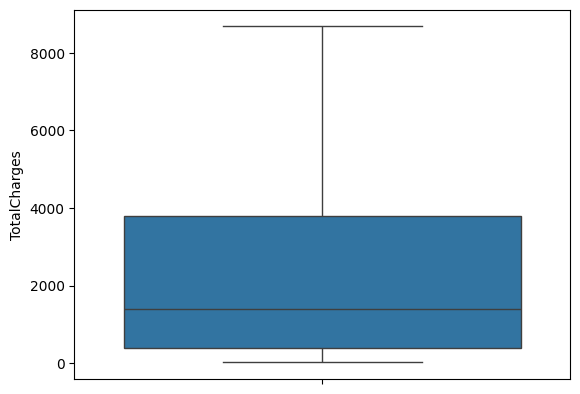

In [92]:
sns.boxplot(df['TotalCharges'])

There is no outliers present in tenure and monthly charge ,and senior citizen column has only 2 values.

In [93]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0.0,5896
1.0,1140


In [94]:
for feature in cat_features:
    print(f"\nValue counts for feature '{feature}':")
    print(data[feature].value_counts())
    print(f"Sum of value counts for '{feature}': {data[feature].value_counts().sum()}")
    print('\n')


Value counts for feature 'customerID':
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
Sum of value counts for 'customerID': 7043



Value counts for feature 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64
Sum of value counts for 'gender': 7043



Value counts for feature 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Sum of value counts for 'Partner': 7043



Value counts for feature 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Sum of value counts for 'Dependents': 7043



Value counts for feature 'PhoneService':
PhoneService
Yes    6349
No      681
Name: count, dtype: int64
Sum of value counts for 'PhoneService': 7030



Value counts for feature 'MultipleLines':
MultipleLines
No                  3382
Yes                 2967
No pho

In [95]:
df[cat_features].value_counts()

,,,,,,,,,,,,,,,,,count
customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,
0002-ORFBO,Female,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,1
6618-RYATB,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,Yes,1
6629-CZTTH,Male,No,No,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Mailed check,Yes,1
6627-CFOSN,Female,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),No,1
6625-UTXEW,Female,Yes,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351-NGXYI,Female,No,No,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,1
3349-ANQNH,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,No,1
3348-CFRNX,Female,Yes,No,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,Yes,1


In [96]:
#no of unique values in cat features
for col in cat_features:
    print(f'Unique values in {col}: {df[col].nunique()}')

Unique values in customerID: 7043
Unique values in gender: 2
Unique values in Partner: 2
Unique values in Dependents: 2
Unique values in PhoneService: 2
Unique values in MultipleLines: 3
Unique values in InternetService: 3
Unique values in OnlineSecurity: 3
Unique values in OnlineBackup: 3
Unique values in DeviceProtection: 3
Unique values in TechSupport: 3
Unique values in StreamingTV: 3
Unique values in StreamingMovies: 3
Unique values in Contract: 3
Unique values in PaperlessBilling: 2
Unique values in PaymentMethod: 4
Unique values in Churn: 2


All values in customer id are unique, i will drop it here since it will not have any influence on target .later i will form a table using this customer id and predctions

In [97]:
df=df.drop('customerID',axis=1)

In [98]:
cat_features.remove('customerID')

**This is a prediction problem ...classification problem .Target column is 'churn'**

In [99]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [100]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


**Target column churn is imbalanced ,where NO  is the majority ...so we need to correct this imbalance befor feeding it into ml model.otherwise chances of getting False negative is high.**

Histplot of numerical variables


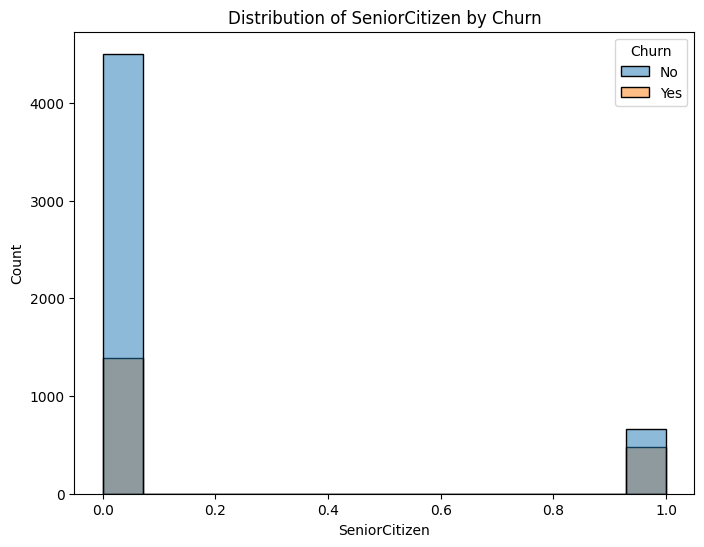

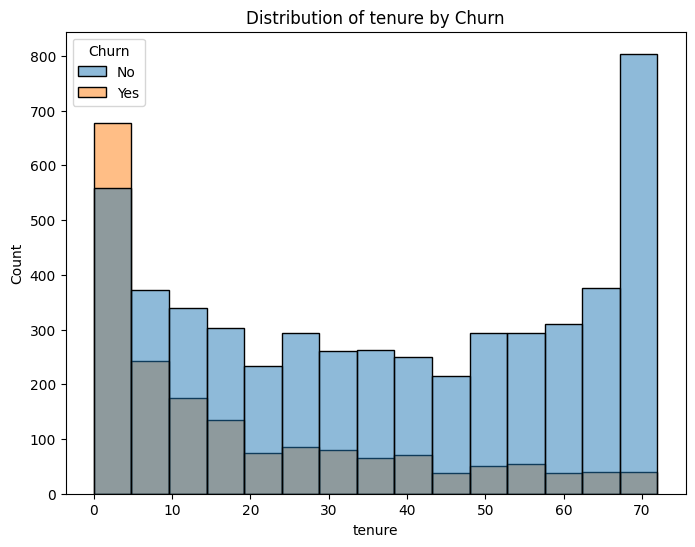

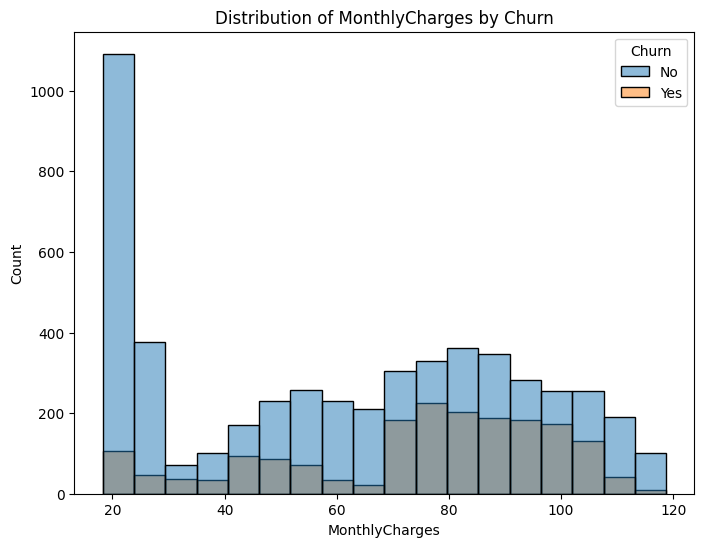

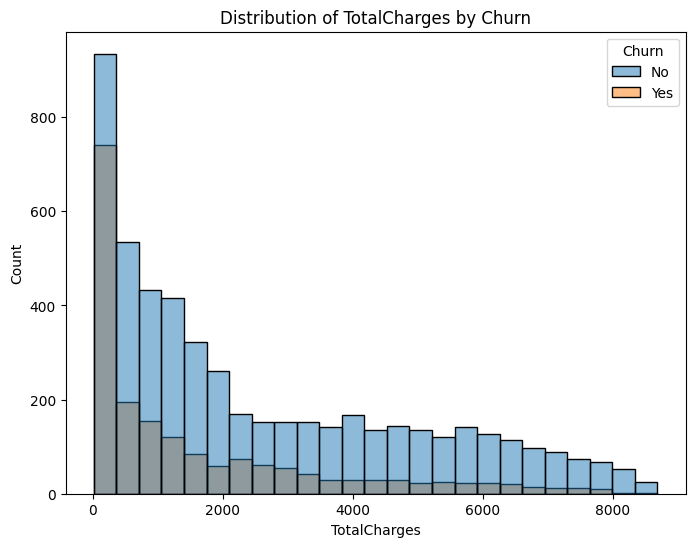

In [101]:
# Histplot of numerical features with hue as 'Churn'
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

HANDLING MISSING VALUES

In [102]:
# Fill missing values in numerical features with the median
for col in numerical_features:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

# Fill missing values in categorical features with the mode
for col in cat_features:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

In [103]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Correlation matrix

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.017974        0.220620      0.103519
tenure               0.017974  1.000000        0.246352      0.823834
MonthlyCharges       0.220620  0.246352        1.000000      0.649965
TotalCharges         0.103519  0.823834        0.649965      1.000000


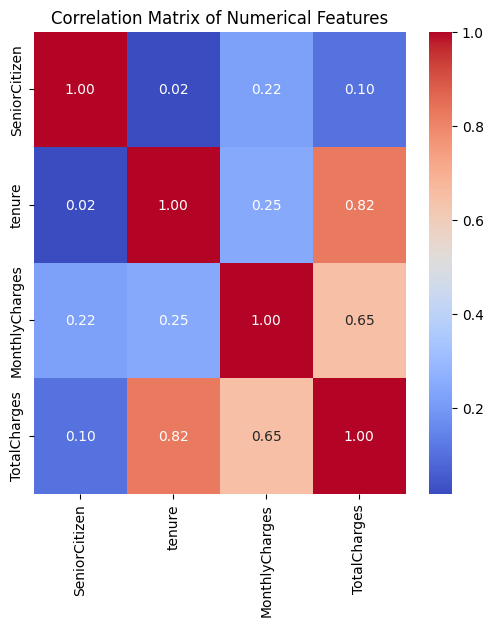

In [104]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

CROSS TAB OF CATEGORICAL FEATURES

In [105]:
for col in cat_features:
  crosstab=pd.crosstab(df[col],df['Churn'])#,normalize='index')
  print(f"Crosstab for {col} and {'Churn'}:")
  print(crosstab)
  print('\n')

Crosstab for gender and Churn:
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


Crosstab for Partner and Churn:
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669


Crosstab for Dependents and Churn:
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326


Crosstab for PhoneService and Churn:
Churn           No   Yes
PhoneService            
No             512   169
Yes           4662  1700


Crosstab for MultipleLines and Churn:
Churn               No  Yes
MultipleLines              
No                2544  851
No phone service   512  169
Yes               2118  849


Crosstab for InternetService and Churn:
Churn              No   Yes
InternetService            
DSL              1951   456
Fiber optic      1817  1301
No               1406   112


Crosstab for OnlineSecurity and Churn:
Churn                  No   Yes
OnlineSecurity                 
No                   2045  1462
No internet serv

CHI SQUARE TEST to find feature significance

In [106]:

from scipy.stats import chi2_contingency
columns_to_test =cat_features

for col in columns_to_test:

    crosstab = pd.crosstab(df[col], df['Churn'])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-square test for {col}:")
    print(f"Chi2: {chi2}, p-value: {p}")

    #  significance level (alpha)
    alpha = 0.05
    if p < alpha:
        print(f"There is a statistically significant association between {col} and PotentialFraud.")
    else:
        print(f"There is no statistically significant association between {col} and PotentialFraud.")
    print("-" * 20)

Chi-square test for gender:
Chi2: 0.4840828822091383, p-value: 0.48657873605618596
There is no statistically significant association between gender and PotentialFraud.
--------------------
Chi-square test for Partner:
Chi2: 158.7333820309922, p-value: 2.1399113440759935e-36
There is a statistically significant association between Partner and PotentialFraud.
--------------------
Chi-square test for Dependents:
Chi2: 189.12924940423474, p-value: 4.9249216612154196e-43
There is a statistically significant association between Dependents and PotentialFraud.
--------------------
Chi-square test for PhoneService:
Chi2: 1.0491579259939365, p-value: 0.3057011037833114
There is no statistically significant association between PhoneService and PotentialFraud.
--------------------
Chi-square test for MultipleLines:
Chi2: 11.371348981597901, p-value: 0.0033942430916388635
There is a statistically significant association between MultipleLines and PotentialFraud.
--------------------
Chi-square test 

From the chi square test it is clear that TotalCharges and PhoneService have no statistical significance with the target .so we can drop these columns.

In [107]:
df=df.drop(['gender','PhoneService'],axis=1)

In [108]:
df.shape

(7043, 18)

In [109]:
df['InternetService']

,InternetService
0,DSL
1,DSL
2,DSL
3,DSL
4,Fiber optic
...,...
7038,DSL
7039,Fiber optic
7040,DSL
7041,Fiber optic


In [65]:
df['InternetService'].nunique()

3

**FEATURE ENGINEERING**

In [110]:
df['has_internet'] = df['InternetService'].apply(lambda x: 1 if x != 'No' else 0)
# Drop the original 'InternetService' column
df = df.drop(columns=['InternetService'])


In [111]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'has_internet'],
      dtype='object')

ENCODING CATEGORICAL FEATURES

In [112]:
cat_features.remove('InternetService')

In [114]:
cat_features.remove('gender')
cat_features.remove('PhoneService')


In [115]:
cat_features

['Partner',
 'Dependents',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

**Label encoding**

In [116]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [117]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Iterate through categorical features and apply label encoding
for col in cat_features:
    df[col] = le.fit_transform(df[col])

In [118]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_internet
0,0.0,1,0,1.0,1,0,2,0,0,0,0,0,1,2,29.85,29.85,0,1
1,0.0,0,0,34.0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,1
2,0.0,0,0,2.0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,1
3,0.0,0,0,45.0,1,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,1
4,0.0,0,0,2.0,0,0,0,0,0,0,0,0,1,2,70.70,151.65,1,1


oversamp;ling (smote to remove imbalnce)

In [126]:
df2=df.copy()#encoded df

In [138]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the target column
x=df.drop(['Churn'],axis=1)
y=df['Churn']
smote = SMOTE(random_state=42)#sampling_strategy='minority'
X_resampled, y_resampled = smote.fit_resample(x, y)



In [139]:
X_resampled.shape

(10348, 17)

In [140]:
cat_features

['Partner',
 'Dependents',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Applying stabdard scaler to make mean 0 and std 1

In [141]:
x.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'has_internet'],
      dtype='object')

drop all encoded columns,we dont need to scale

In [142]:
x1=x.drop(['Partner',
 'Dependents',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'],axis=1)

In [143]:
x1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'has_internet'],
      dtype='object')

In [144]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=scaler.fit_transform(x1)

In [145]:
type(x1)

numpy.ndarray

In [146]:
x1=pd.DataFrame(x1)

In [147]:
x1.head()

,0,1,2,3,4
0,-0.439457,-1.278143,-1.161823,-0.994287,0.524167
1,-0.439457,0.066784,-0.260194,-0.172905,0.524167
2,-0.439457,-1.237388,-0.363332,-0.959703,0.524167
3,-0.439457,0.515093,-0.747606,-0.194437,0.524167
4,-0.439457,-1.237388,0.197275,-0.940490,0.524167


In [148]:
x1.describe()

,0,1,2,3,4
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,-3.934569e-17,-6.204512e-17,-3.894214e-16,-3.531023e-17,3.934569e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-4.394566e-01,-1.318899e+00,-1.547761e+00,-9.991677e-01,-1.907789e+00
25%,-4.394566e-01,-9.521004e-01,-9.713499e-01,-8.296705e-01,5.241671e-01
50%,-4.394566e-01,-1.369931e-01,1.856306e-01,-3.903030e-01,5.241671e-01
75%,-4.394566e-01,9.226464e-01,8.344047e-01,6.635167e-01,5.241671e-01
max,2.275537e+00,1.615488e+00,1.795921e+00,2.828487e+00,5.241671e-01


In [149]:
x1.columns=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'has_internet']

In [150]:
x.drop(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'has_internet'],axis=1,inplace=True)

AFTER SCALING MERGE X AND X1

In [151]:
x=pd.concat([x,x1],axis=1)

In [152]:
x.head()

,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,has_internet
0,1,0,1,0,2,0,0,0,0,0,1,2,-0.439457,-1.278143,-1.161823,-0.994287,0.524167
1,0,0,0,2,0,2,0,0,0,1,0,3,-0.439457,0.066784,-0.260194,-0.172905,0.524167
2,0,0,0,2,2,0,0,0,0,0,1,3,-0.439457,-1.237388,-0.363332,-0.959703,0.524167
3,0,0,1,2,0,2,2,0,0,1,0,0,-0.439457,0.515093,-0.747606,-0.194437,0.524167
4,0,0,0,0,0,0,0,0,0,0,1,2,-0.439457,-1.237388,0.197275,-0.940490,0.524167


In [153]:
x.shape

(7043, 17)

SCALING OVERSAMPLED DATA

In [154]:
x1_resampled=X_resampled.drop(['Partner',
 'Dependents',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'],axis=1)

In [155]:
x1_resampled.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'has_internet'],
      dtype='object')

In [156]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1_resampled=scaler.fit_transform(x1_resampled)

In [158]:
x1_resampled=pd.DataFrame(x1_resampled)

In [159]:
x1_resampled.head()

,0,1,2,3,4
0,-0.517043,-1.119552,-1.343093,-0.927759,0.44602
1,-0.517043,0.261016,-0.394282,-0.073707,0.44602
2,-0.517043,-1.077717,-0.502818,-0.891799,0.44602
3,-0.517043,0.721206,-0.907200,-0.096096,0.44602
4,-0.517043,-1.077717,0.087125,-0.871821,0.44602


In [160]:
x1_resampled.columns=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'has_internet']

In [163]:
X_resampled=pd.concat([X_resampled,x1_resampled],axis=1)

In [165]:
X_resampled.head()

,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,has_internet
0,1,0,1,0,2,0,0,0,0,0,1,2,-0.517043,-1.119552,-1.343093,-0.927759,0.44602
1,0,0,0,2,0,2,0,0,0,1,0,3,-0.517043,0.261016,-0.394282,-0.073707,0.44602
2,0,0,0,2,2,0,0,0,0,0,1,3,-0.517043,-1.077717,-0.502818,-0.891799,0.44602
3,0,0,1,2,0,2,2,0,0,1,0,0,-0.517043,0.721206,-0.907200,-0.096096,0.44602
4,0,0,0,0,0,0,0,0,0,0,1,2,-0.517043,-1.077717,0.087125,-0.871821,0.44602


Both oversampled and normal data are standard scaled

In [167]:
#train test split
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

APPLYING PCA FOR DIMENSIONALITY REDUCTION

In [169]:
#  PCA WITH 97 VARIANCE

from sklearn.decomposition import PCA

# Apply PCA with 97% variance explained
pca = PCA(n_components=0.97, random_state=42)
X1_train_pca = pca.fit_transform(X1_train)
X1_test_pca = pca.transform(X1_test)

print(f"Number of components after PCA: {pca.n_components_}")

Number of components after PCA: 14


In [170]:

X1_train_pca=pd.DataFrame(data=X1_train_pca,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14'])

In [171]:
X1_test_pca=pd.DataFrame(data=X1_test_pca,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14'])

In [172]:
X1_test_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14
0,1.462704,1.618884,-0.062976,1.515299,0.252248,0.335611,0.354461,-0.704921,-0.413677,-1.371160,-0.711308,-0.706788,-0.381790,-0.871390
1,-1.367796,-2.342423,-0.425214,0.611477,-1.970324,0.043967,0.559942,0.130906,0.741104,-0.202531,0.305585,-0.757412,0.157385,-0.524492
2,2.287174,0.523361,0.528618,-0.824596,0.434166,0.800226,-0.762890,-1.608666,-0.741479,0.482882,1.261502,-0.008726,0.233580,0.156384
3,-1.687970,0.694700,-1.332105,-0.489443,-0.238923,-0.617306,-0.203211,-0.319361,0.031024,0.103240,0.655864,-0.266373,-0.415490,-0.391388
4,3.015168,0.363016,1.084166,-1.162572,0.021547,0.321056,-1.306290,0.362088,-0.297025,-0.118898,-1.187773,-0.874985,0.135494,0.137523


MODELLING

In [173]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score,precision_score,recall_score

# Initialize and train a Logistic Regression model
lgr = LogisticRegression(random_state=42)
lgr.fit(X1_train_pca, y1_train)

# Make predictions on the test set
y1_pred_lgr = lgr.predict(X1_test_pca)

# Evaluate the model
print("Logistic Regression:")
print(classification_report(y1_test,y1_pred_lgr))
print(confusion_matrix(y1_test, y1_pred_lgr))
print("Accuracy:", accuracy_score(y1_test,y1_pred_lgr))
print("F1 score:",f1_score(y1_test, y1_pred_lgr))
print("Precision:",precision_score(y1_test, y1_pred_lgr))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1021
           1       0.78      0.85      0.82      1049

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070

[[772 249]
 [155 894]]
Accuracy: 0.8048309178743961
F1 score: 0.8156934306569343
Precision: 0.7821522309711286


In [175]:
#ROC-AUC for logistic regression

from sklearn.metrics import roc_auc_score
y1_pred_proba_lgr = lgr.predict_proba(X1_test_pca)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y1_test, y1_pred_proba_lgr)

print(f"ROC AUC score: {roc_auc}")

ROC AUC score: 0.8794407060873236


Logistic regression for oversampled without pca

In [176]:
# Initialize and train a Logistic Regression model
lgr = LogisticRegression(random_state=42)
lgr.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred_lgr = lgr.predict(X1_test)

# Evaluate the model
print("Logistic Regression:")
print(classification_report(y1_test,y1_pred_lgr))
print(confusion_matrix(y1_test, y1_pred_lgr))
print("Accuracy:", accuracy_score(y1_test,y1_pred_lgr))
print("F1 score:",f1_score(y1_test, y1_pred_lgr))
print("Precision:",precision_score(y1_test, y1_pred_lgr))

#ROC-AUC for logistic regression
y1_pred_proba_lgr = lgr.predict_proba(X1_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y1_test, y1_pred_proba_lgr)

print(f"ROC AUC score: {roc_auc}")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1021
           1       0.79      0.85      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070

[[780 241]
 [157 892]]
Accuracy: 0.8077294685990338
F1 score: 0.8175985334555453
Precision: 0.7872903795233892
ROC AUC score: 0.8847925686419321


With pca and without pca not much difference in the metrics

**Applying Random forest classifier**

In [182]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
model_rf=rf_classifier.fit(X1_train_pca, y1_train)

# Make predictions
y1_pred_rf =model_rf.predict(X1_test_pca)


# Evaluate the Random Forest model
print("\nRandom Forest:")
print(classification_report(y1_test, y1_pred_rf))
print(confusion_matrix(y1_test, y1_pred_rf))
print("Accuracy:", accuracy_score(y1_test, y1_pred_rf))
print("Accuracy:", accuracy_score(y1_test,y1_pred_rf))
print("F1 score:",f1_score(y1_test, y1_pred_rf))
print("Precision:",precision_score(y1_test, y1_pred_rf))

#ROC-AUC for rf
from sklearn.metrics import roc_auc_score
y1_pred_proba_rf =model_rf.predict_proba(X1_test_pca)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y1_test, y1_pred_proba_rf)

print(f"ROC AUC score: {roc_auc}")


Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1021
           1       0.84      0.83      0.83      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

[[851 170]
 [179 870]]
Accuracy: 0.8314009661835748
Accuracy: 0.8314009661835748
F1 score: 0.832934418382001
Precision: 0.8365384615384616
ROC AUC score: 0.9104127899431295


For normal data

In [181]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
model_rf2=rf_classifier.fit(X1_train, y1_train)

# Make predictions
y1_pred_rf =model_rf2.predict(X1_test)


# Evaluate the Random Forest model
print("\nRandom Forest:")
print(classification_report(y1_test, y1_pred_rf))
print(confusion_matrix(y1_test, y1_pred_rf))
print("Accuracy:", accuracy_score(y1_test, y1_pred_rf))
print("Accuracy:", accuracy_score(y1_test,y1_pred_rf))
print("F1 score:",f1_score(y1_test, y1_pred_rf))
print("Precision:",precision_score(y1_test, y1_pred_rf))

#ROC-AUC for rf
from sklearn.metrics import roc_auc_score
y1_pred_proba_rf =model_rf2.predict_proba(X1_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y1_test, y1_pred_proba_rf)

print(f"ROC AUC score: {roc_auc}")


Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1021
           1       0.86      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

[[875 146]
 [148 901]]
Accuracy: 0.8579710144927536
Accuracy: 0.8579710144927536
F1 score: 0.8597328244274809
Precision: 0.8605539637058262
ROC AUC score: 0.9295929428614911


Better ruc auc score for RANDOM forest without pca

SVM MODELLING

i am applying svm only to normal data without pca

In [184]:
from sklearn.svm import SVC

# Initialize and train an SVM classifier
svm_classifier = SVC(random_state=42,kernel='linear')
svm_classifier.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred_svm = svm_classifier.predict(X1_test)
model_svm=svm_classifier.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred_svm = model_svm.predict(X1_test)

# Evaluate the SVM model
print("\nSVM:")
print(classification_report(y1_test, y1_pred_svm))
print(confusion_matrix(y1_test, y1_pred_svm))
print("Accuracy:",accuracy_score(y1_test,y1_pred_svm))
print("Accuracy:", accuracy_score(y1_test, y1_pred_svm))
print("Accuracy:", accuracy_score(y1_test,y1_pred_svm))
print("F1 score:",f1_score(y1_test, y1_pred_svm))
print("Precision:",precision_score(y1_test, y1_pred_svm))

#ROC-AUC for rf
from sklearn.metrics import roc_auc_score
y1_pred_proba_svm=model_rf2.predict_proba(X1_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y1_test, y1_pred_proba_svm)

print(f"ROC AUC score: {roc_auc}")


SVM:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1021
           1       0.78      0.85      0.82      1049

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070

[[772 249]
 [155 894]]
Accuracy: 0.8048309178743961
Accuracy: 0.8048309178743961
Accuracy: 0.8048309178743961
F1 score: 0.8156934306569343
Precision: 0.7821522309711286
ROC AUC score: 0.9295929428614911


**xgboost**

In [185]:
import xgboost as xgb

# Initialize and train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred_xgb = xgb_classifier.predict(X1_test)

# Evaluate the XGBoost model
print("\nXGBoost:")
print(classification_report(y1_test, y1_pred_xgb))
print(confusion_matrix(y1_test, y1_pred_xgb))
print("Accuracy:", accuracy_score(y1_test, y1_pred_xgb))
print("F1 score:", f1_score(y1_test, y1_pred_xgb))
print("Precision:", precision_score(y1_test, y1_pred_xgb))

#ROC-AUC for xgboost
y1_pred_proba_xgb = xgb_classifier.predict_proba(X1_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y1_test, y1_pred_proba_xgb)

print(f"ROC AUC score: {roc_auc}")


XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1021
           1       0.84      0.85      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

[[855 166]
 [158 891]]
Accuracy: 0.8434782608695652
F1 score: 0.8461538461538461
Precision: 0.8429517502365185
ROC AUC score: 0.9287941783088973


among this better performance with rf ...both precisicison recall f1 score roc -auc score

In [187]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=300,random_state=42)
model_rf2=rf_classifier.fit(X1_train, y1_train)

# Make predictions
y1_pred_rf =model_rf2.predict(X1_test)


# Evaluate the Random Forest model
print("\nRandom Forest:")
print(classification_report(y1_test, y1_pred_rf))
print(confusion_matrix(y1_test, y1_pred_rf))
print("Accuracy:", accuracy_score(y1_test, y1_pred_rf))
print("Accuracy:", accuracy_score(y1_test,y1_pred_rf))
print("F1 score:",f1_score(y1_test, y1_pred_rf))
print("Precision:",precision_score(y1_test, y1_pred_rf))

#ROC-AUC for rf
from sklearn.metrics import roc_auc_score
y1_pred_proba_rf =model_rf2.predict_proba(X1_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y1_test, y1_pred_proba_rf)

print(f"ROC AUC score: {roc_auc}")


Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1021
           1       0.86      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

[[879 142]
 [149 900]]
Accuracy: 0.8594202898550725
Accuracy: 0.8594202898550725
F1 score: 0.860832137733142
Precision: 0.8637236084452975
ROC AUC score: 0.9313519988721126


i got better performance with random forest classifier with n estimator 200..so fix it as the model for my problem

In [188]:
data1=data['customerID']

In [191]:
#  convert  y1_pred_rf  to df

y1_pred_rf_df = pd.DataFrame(y1_pred_rf, columns=['predicted_churn'])
print(y1_pred_rf_df.head())

   predicted_churn
0                1
1                0
2                0
3                1
4                1


In [194]:
data1['Churn']=y1_pred_rf_df

In [193]:
data1

,customerID
0,7590-VHVEG
1,5575-GNVDE
2,3668-QPYBK
3,7795-CFOCW
4,9237-HQITU
...,...
7039,2234-XADUH
7040,4801-JZAZL
7041,8361-LTMKD
7042,3186-AJIEK
